# Self-Organizing Map for Fraud Detection

## Project Overview:

The **"Self-Organizing Map for Fraud Detection" project** utilizes a Self-Organizing Map (SOM) to identify potential instances of fraud in credit card applications. The SOM is a type of artificial neural network that excels at capturing patterns in high-dimensional data, making it well-suited for detecting outliers in a dataset.


The dataset comprises customer information submitted during applications for advanced credit cards. Our objective is to identify potential instances of fraud within these applications, ultimately providing a definitive list of customers who may have engaged in *fraudulent activities*.

We will employ an **unsupervised deep-learning model** to make predictions regarding the potential involvement of each customer in fraudulent activities, utilizing a binary dependent variable (Yes/No). This entails discovering patterns within a high-dimensional dataset characterized by non-linear relationships, one of which signifies potential fraud. 

Although the example presented here is simplified, it offers insights into the functioning of Self-Organizing Maps (SOMs). It illuminates how SOMs operate, self-organize, acquire knowledge, capture data set similarities and correlations, and represent them within a two-dimensional map.

Inputs, represented by customers, are mapped onto the output space. The neural network bridging these two spaces is composed of multiple neurons, each initialized with a vector of weights equivalent in size to the customer vector (15 elements). For every observation point (customer), the output corresponds to the nearest neuron, effectively selecting the neuron closest to the customer, referred to as the winning node. The winning node is the neuron most akin to the customer.

In each training epoch, the output space gradually contracts until further reduction ceases. At this point, we have achieved a two-dimensional Self-Organizing Map.

Fraud can be defined as any behavior significantly deviating from established norms applicable to credit card usage. Consequently, instances of fraud correspond to the outlier neurons within the two-dimensional SOM, as these neurons are distanced from the majority that adhere to established rules.


## Key Steps and Components:

1. **Data Import and Preprocessing:**
- The project begins by importing customer data from credit card applications.
- The dataset is preprocessed, including feature scaling using MinMaxScaler, which scales the features to a specific range (0 to 1).
2. **Training the SOM:**
- A MiniSom package is utilized to create and train the Self-Organizing Map.
- The SOM is initialized with specific dimensions (10x10) and input length.
- Weights are randomly initialized.**
- The SOM is trained using random data for a specified number of iterations.
3. **Visualizing the Results:**
- To visualize the SOM's output, we use **the distance map** to create a visual representation.
- The visualization highlights regions of the map with different colors.
- Actual data points are plotted on the map, with markers distinguishing between fraudulent and non-fraudulent applications.
4. **Finding the Frauds:**
- The SOM is employed to map and cluster data.
- Potential fraudulent applications are identified based on their proximity to specific clusters on the SOM.
5. **Printing Fraudulent Client IDs:**
- The project concludes by printing the IDs of customers associated with potential fraudulent applications.


## Conclusion:

The **"Self-Organizing Map for Fraud Detection"** project offers a practical application of machine learning and SOMs for fraud detection, which can be crucial for financial institutions. This project demonstrates the ability to uncover patterns and identify outliers within a dataset, which is a fundamental skill in data analysis and fraud prevention.

## Install MiniSom Package

In [17]:
!pip3 install MiniSom

### Importing the libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

The data set available on [this page](http://archive.ics.uci.edu/dataset/143/statlog+australian+credit+approval).

In [19]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [20]:
dataset.head(3)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0


In [21]:
dataset.shape

(690, 16)

## Feature Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

## Training the SOM

In [23]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the results

The 2-dimensional grid contains all the winning nodes and for each winning node, we will get the most important factor which is the MID (Mean Interneuron Distance). MID is the mean of the distances of all the neurons inside the defined neighborhood (based on sigma/radius). The higher the MID, the more the winning node will be far away from its neighbors so the more likely to be an outlier. 
We will show the distance by color, which means the larger the MID, the closer the color is to the white. 

Here is a description of the code:

- generating Self Organizing Map (SOM)

- From pylab, it imports functions for plotting - bone() for blank figure, pcolor() for heat map, colorbar(), plot() and show() to display.

- bone() creates a blank plot figure.

- **pcolor(som.distance_map().T** plots the distance map as a heat map, where darker pixels indicate more similar neurons in the SOM. 

- **colorbar()** adds a color bar to map distance values to colors.

- It then loops through each data point (x) in X:

- som.winner(x) finds the neuron/node that best matches this data point. 

- This **winner node** coordinates are plotted using plot(). 

- Different markers and colors are used based on the class (y) of each data point.

- The nodes are plotted at non-integer coordinates to prevent overlap.

- show() displays the final visualization, with heat map in the background and data points plotted on the nodes.

This provides an interactive visualization of how the SOM has mapped the multi-dimensional data onto a 2D surface.

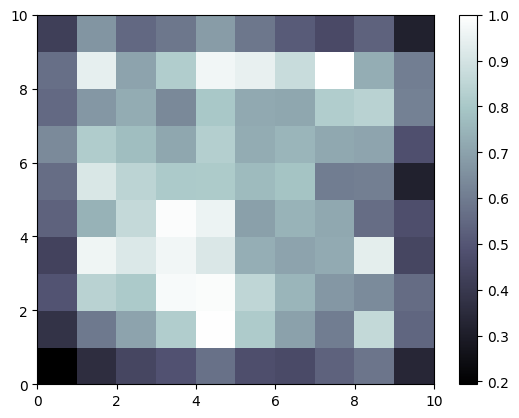

In [52]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()

We now add some markers in order to make the distinction between the customers who have got approval and those who have not. Because the customers who have cheated and got approval are more relevant to fraud detection than those who have cheated and not approved. So, we will observe where the customers are on this map. We will add some markers to tell whether the customers associated with each of these winning nodes got approval or not. 
* **The red circles** correspond to the customers who did not get approval
* **The green squares** correspond to the customers who got approval

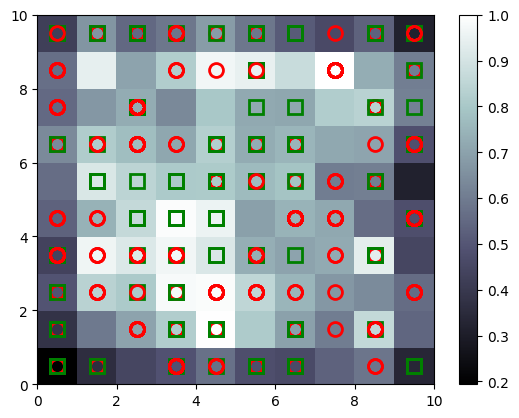

In [55]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds

The error indicates that the arrays being concatenated have different numbers of dimensions, which is not allowed.

The issue is that **mappings[(1,1)]** returns a 1D array, while **mappings[(4,1)]** returns a 2D array.

To fix it, you need to make sure both have the same dimensions before concatenating. 

1. A simple fix is to add **.reshape(-1, 1)** to **mappings[(1,1)]** to make it 2D with one column:

```python
frauds = np.concatenate((mappings[(1,1)].reshape(-1,1), mappings[(4,1)]), axis = 0) 
```

This reshapes the 1D array to a 2D array with one column, matching the dimensions of mappings[(4,1)], so they can now be concatenated along axis 0.

2. Alternatively, you could extract just the first row from mappings[(4,1)] to match the 1D shape:

```python 
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)][0]), axis=0)
```
The key is to make sure both arrays going into np.concatenate have matching dimensions (number of axes) before concatenating them.

---------------------------------------------------------------------------------------------------------------------------------------------

This error occurs because the mappings returned by som.win_map(X) is a list, not an array.

Lists do not have the reshape method, so you are getting the AttributeError.

To fix it, you need to first convert the list to a numpy array, then reshape:

```python
mappings = np.array(som.win_map(X)) 

frauds = np.concatenate((mappings[(1,1)].reshape(1,-1), 
                          mappings[(4,1)]), axis=0)
```

The changes are:

1. Convert the list returned by win_map to a numpy array using np.array

2. Reshape after converting to array, not on the original list

This works because numpy arrays have the reshape method, allowing you to change the dimensions before concatenating.

So in summary:

- Check if the output is a list 
- Convert list to numpy array 
- Then reshape the array before concatenating

Converting intermediate outputs to numpy arrays enables downstream array operations like reshape.

```python
mappings = som.win_map(X)

point1 = np.array(mappings[(1,1)])  
point2 = np.array(mappings[(4,1)])

frauds = np.concatenate((point1.reshape(1,-1), point2), axis=0)

```                          

In [25]:
mappings = som.win_map(X)
mappings

defaultdict(list,
            {(0,
              3): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.8735269 , 1.        , 0.29819549, 0.00892857, 0.5       ,
                     0.15384615, 0.5       , 0.14035088, 0.        , 0.        ,
                     0.        , 1.        , 0.        , 0.21      , 0.        ]), array([0.75215934, 1.        , 0.32827068, 0.02678571, 0.5       ,
                     0.23076923, 0.375     , 0.05263158, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.1155    , 0.        ]), array([0.72114172, 1.        , 0.15533835, 0.32142857, 0.5       ,
                     0.38461538, 0.375     , 0.00877193, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.        , 0.        ]), array([0.98014648, 1. 

In [56]:
print(type(mappings[(4,4)]))
print(mappings[(4,4)])

<class 'list'>
[array([0.85004144, 1.        , 0.42481203, 0.34964286, 0.5       ,
       1.        , 0.875     , 0.27929825, 1.        , 1.        ,
       0.11940299, 0.        , 0.5       , 0.        , 0.        ]), array([0.52695522, 1.        , 0.41233083, 0.14428571, 0.5       ,
       0.92307692, 0.875     , 0.24561404, 1.        , 1.        ,
       0.11940299, 0.        , 0.5       , 0.16      , 0.        ]), array([0.52909354, 1.        , 0.65669173, 0.30357143, 0.5       ,
       0.69230769, 0.875     , 0.24561404, 1.        , 1.        ,
       0.04477612, 0.        , 0.5       , 0.        , 0.        ]), array([0.56416355, 1.        , 0.2393985 , 0.05053571, 0.5       ,
       0.61538462, 0.875     , 0.02631579, 1.        , 1.        ,
       0.01492537, 0.        , 0.5       , 0.12      , 0.001     ]), array([0.65017679, 1.        , 0.27323308, 0.15928571, 0.5       ,
       0.92307692, 0.875     , 0.21192982, 1.        , 1.        ,
       0.04477612, 0.        , 0.5    

In [57]:
print(type(mappings[(3,4)]))
print(mappings[(3,4)])

<class 'list'>
[array([0.69184196, 0.        , 0.10526316, 0.36607143, 0.5       ,
       0.76923077, 0.375     , 0.02491228, 1.        , 1.        ,
       0.02985075, 1.        , 0.5       , 0.0245    , 0.        ]), array([8.31729595e-01, 0.00000000e+00, 1.05263158e-01, 3.69107143e-01,
       5.00000000e-01, 9.23076923e-01, 8.75000000e-01, 1.17543860e-02,
       1.00000000e+00, 1.00000000e+00, 1.49253731e-02, 1.00000000e+00,
       5.00000000e-01, 4.00000000e-02, 5.00000000e-04]), array([0.46839574, 0.        , 0.26315789, 0.13392857, 0.5       ,
       0.92307692, 0.875     , 0.02192982, 1.        , 1.        ,
       0.13432836, 1.        , 0.5       , 0.0905    , 0.        ]), array([0.56816789, 0.        , 0.13654135, 0.08178571, 0.5       ,
       0.76923077, 0.875     , 0.08035088, 1.        , 1.        ,
       0.10447761, 1.        , 0.5       , 0.07      , 0.02384   ]), array([0.99860649, 0.        , 0.13278195, 0.38392857, 0.5       ,
       0.76923077, 0.375     , 0.01456

In [59]:
frauds = np.concatenate((mappings[(4,4)], mappings[(3,4)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [60]:
frauds.shape

(15, 15)

## Printing the Fraunch Clients

In [61]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15777994
15697310
15697844
15706602
15728082
15675176
15768449
15740356
15738487
15773421
15682686
15707602
15815095
15598614
15712483
